In [2]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import random
import xgboost as xgb
from sklearn.metrics import matthews_corrcoef, roc_auc_score

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.cross_validation import StratifiedKFold
from rgf.sklearn import RGFClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import rankdata

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

C:\Users\royal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [194]:
os.chdir('C:\\Users\\royal\\Downloads\\Compressed\\Hacker-chall\\subm new')

In [192]:
os.chdir('C:\\Users\\royal\\Downloads\\Compressed\\Hacker-chall\\New folder')

In [37]:
os.listdir()

['submission_lgbm1_2nd.csv',
 'submission_lgbm_2nd.csv',
 'submission_lgbm_boruta_83455.csv',
 'submission_lgbm_boruta_83744.csv',
 'submission_lgbm_boruta_83899.csv',
 'submission_lgbm_boruto_random42_83836.csv',
 'submission_lgbm_dae_82958.csv',
 'submission_lgbm_dae_831.csv',
 'submission_lgbm_label.csv',
 'submission_lgbm_labelall_83773.csv',
 'submission_lgbm_label_iter.csv',
 'submission_lr_83915.csv',
 'submission_lr_dae_813.csv',
 'submission_lr_dae_81711.csv',
 'submission_nn_dae_82060.csv',
 'submission_nn_dae_82339.csv',
 'submission_nn_label.csv',
 'submission_nn_label2.csv',
 'submission_port.csv',
 'submission_rgf_label.csv',
 'submission_rgf_labelall_83870.csv',
 'submission_test_lgbm_boruta_0.6487886437082024.csv',
 'submission_test_lgbm_dae83060_0.637506292826641.csv',
 'submission_test_lgbm_dae8310_0.6325875913535679.csv',
 'submission_test_lr_label_0.6368902511017857.csv',
 'submission_test_nn_0.6354101561578097.csv',
 'submission_test_nn_dae82060_0.6008897633954858.

In [193]:
%%time

##all the submission files from boruta feature selection,labelencoder and extra feature selection plus some nn.
sub_0 = pd.read_csv('submission_lgbm1_2nd.csv')
sub_1 = pd.read_csv('submission_lgbm_2nd.csv')
sub_2 = pd.read_csv('submission_lgbm_boruta_83455.csv')
sub_3 = pd.read_csv('submission_lgbm_boruta_83744.csv')
sub_4 = pd.read_csv('submission_lgbm_boruta_83899.csv')
sub_5 = pd.read_csv('submission_lgbm_boruto_random42_83836.csv')
sub_6 = pd.read_csv('submission_lgbm_dae_82958.csv')
sub_7 = pd.read_csv('submission_lgbm_dae_831.csv')
sub_8 = pd.read_csv('submission_lgbm_label.csv')
sub_9 = pd.read_csv('submission_lgbm_labelall_83773.csv')
sub_10 = pd.read_csv('submission_lgbm_label_iter.csv')
sub_11 = pd.read_csv('submission_lr_83915.csv')
sub_12 = pd.read_csv('submission_lr_dae_813.csv')
sub_13 = pd.read_csv('submission_lr_dae_81711.csv')
sub_14 = pd.read_csv('submission_nn_dae_82060.csv')
sub_15 = pd.read_csv('submission_nn_dae_82339.csv')
sub_16 = pd.read_csv('submission_nn_label.csv')
sub_17 = pd.read_csv('submission_nn_label2.csv')
sub_18 = pd.read_csv('submission_port.csv')
sub_19 = pd.read_csv('submission_rgf_label.csv')
sub_20 = pd.read_csv('submission_rgf_labelall_83870.csv')
sub_21 = pd.read_csv('submission_test_lgbm_boruta_0.6487886437082024.csv')
sub_22 = pd.read_csv('submission_test_lgbm_dae83060_0.637506292826641.csv')
sub_23 = pd.read_csv('submission_test_lgbm_dae8310_0.6325875913535679.csv')
sub_24 = pd.read_csv('submission_test_lr_label_0.6368902511017857.csv')
sub_25 = pd.read_csv('submission_test_nn_0.6354101561578097.csv')
sub_26 = pd.read_csv('submission_test_nn_dae82060_0.6008897633954858.csv')
sub_27 = pd.read_csv('submission_test_nn_dae8233_0.6230026291133335.csv')
sub_28 = pd.read_csv('submission_test_nn_dae8238_0.605955864392005.csv')
sub_29 = pd.read_csv('submission_test__Rfc_0.6022755875780139.csv')
sub_30 = pd.read_csv('submission_test__Ridge_0.6109598546734528.csv')
sub_31 = pd.read_csv('submission_train_lgbm_boruta_0.6487886437082024.csv')
sub_32 = pd.read_csv('submission_train_lgbm_dae83060_0.637506292826641.csv')
sub_33 = pd.read_csv('submission_train_lgbm_dae8310_0.6325875913535679.csv')
sub_34 = pd.read_csv('submission_train_lr_label_0.6368902511017857.csv')
sub_35 = pd.read_csv('submission_train_nn_0.6354101561578097.csv')
sub_36 = pd.read_csv('submission_train_nn_dae82060_0.6008897633954858.csv')
sub_37 = pd.read_csv('submission_train_nn_dae8233_0.6230026291133335.csv')
sub_38 = pd.read_csv('submission_train_nn_dae8238_0.605955864392005.csv')
sub_39 = pd.read_csv('submission_train__Rfc_0.6022755875780139.csv')
sub_40 = pd.read_csv('submission_train__Ridge_0.6109598546734528.csv')

Wall time: 967 ms


In [189]:
%%time
## submision files for logistic regression,lightgbm,xgboost,extratree,stacked with extratrees,rgf with different features.
## and highest Public submission files 
lr_ts=pd.read_csv('submission_test__Lr_0.650642725010492.csv')
lr_tr=pd.read_csv('submission_train__Lr_0.650642725010492.csv')
lr_ts1=pd.read_csv('submission_test_lr1_0.6480558723778655.csv')
lr_tr1=pd.read_csv('submission_train_lr1_0.6480558723778655.csv')
lr_tsnew=pd.read_csv('submission_test_lrnew_0.6540454957985281.csv')
lr_tsnew1=pd.read_csv('submission_test_lrnew1_0.6500868736697051.csv')
lr_trnew=pd.read_csv('submission_train_lrnew_0.6540454957985281.csv')
lr_trnew1=pd.read_csv('submission_train_lrnew1_0.6500868736697051.csv')
lr_tsfet=pd.read_csv('submission_test_lrfet_0.616734100860398.csv')
lr_tsstack=pd.read_csv('submission_test_lrstack_0.6516552034687685.csv')
lr_tsstack1=pd.read_csv('submission_test_lrstack1_0.6573487283647758.csv')
lr_tsstack2=pd.read_csv('submission_test_lrstack_0.6573487283647758.csv')

lr_trfet=pd.read_csv('submission_train_lrfet_0.616734100860398.csv')
lr_trstack=pd.read_csv('submission_train_lrstack_0.6516552034687685.csv')
lr_trstack1=pd.read_csv('submission_train_lrstack1_0.6573487283647758.csv')
lr_trstack2=pd.read_csv('submission_train_lrstack_0.6573487283647758.csv')

grad_ts=pd.read_csv('submission_test_gradb_0.6465276915460432.csv')
grad_tr=pd.read_csv('submission_train_gradb_0.6465276915460432.csv')
extra_ts=pd.read_csv('submission_test_extra_0.6283539057168667.csv')
extra_tr=pd.read_csv('submission_train_extra_0.6283539057168667.csv')

rgf_ts=pd.read_csv('submission_test__Rgf_0.6517340388845543.csv')
rgf_tr=pd.read_csv('submission_train__Rgf_0.6517340388845543.csv')
rgf_ts1=pd.read_csv('submission_test_rgf1_0.6524804305628167.csv')
rgf_tr1=pd.read_csv('submission_train_rgf1_0.6524804305628167.csv')

rgf_tsnew=pd.read_csv('submission_test_rgfnew_0.6545310871113001.csv')
rgf_tsnew1=pd.read_csv('submission_test_rgfnew1_0.654866852695362.csv')
rgf_tsnew2=pd.read_csv('submission_test_rgfnew2_0.6510651347099539.csv')
rgf_tsnew3=pd.read_csv('submission_test_rgfnew3_0.6554552773394653.csv')
rgf_tsnew4=pd.read_csv('submission_test_rgfnew4_0.6548804731510887.csv')

rgf_trnew=pd.read_csv('submission_train_rgfnew_0.6545310871113001.csv')
rgf_trnew1=pd.read_csv('submission_train_rgfnew1_0.654866852695362.csv')
rgf_trnew2=pd.read_csv('submission_train_rgfnew2_0.6510651347099539.csv')
rgf_trnew3=pd.read_csv('submission_train_rgfnew3_0.6554552773394653.csv')
rgf_trnew4=pd.read_csv('submission_train_rgfnew4_0.6548804731510887.csv')

# ridg_ts=pd.read_csv('submission_test__Ridge_0.6109598546734528.csv')
#ridg_tr=pd.read_csv('submission_train__Ridge_0.6109598546734528.csv')
xgb_ts=pd.read_csv('submission_test__Xgb_0.6476731391728516.csv')
xgb_tr=pd.read_csv('submission_train__Xgb_0.6476731391728516.csv')
xgb_ts1=pd.read_csv('submission_test_xgb1_0.6479415213698564.csv')
xgb_tr1=pd.read_csv('submission_train_xgb1_0.6479415213698564.csv')
xgb_tsnew1=pd.read_csv('submission_test_xgbnew1_0.6531697350622465.csv')
xgb_trnew1=pd.read_csv('submission_train_xgbnew1_0.6531697350622465.csv')

lgb_ts = pd.read_csv('submission_test__Lgb_0.6492425994942331.csv')
lgb_ts1 = pd.read_csv('submission_test_lgb_0.6528358322312017.csv')
lgb_ts2 = pd.read_csv('submission_test_lgb2_0.6540413491454506.csv')
lgb_ts3 = pd.read_csv('submission_test_lgb3_0.6528336213901496.csv')
lgb_ts4 = pd.read_csv('submission_test_lgb4_0.654614977600063.csv')
lgb_ts5 = pd.read_csv('submission_test_lgb5_0.648383958469833.csv')
lgb_ts6 = pd.read_csv('submission_test_lgb6_0.653353950363284.csv')
lgb_ts7 = pd.read_csv('submission_test_lgb7_0.6483687842355492.csv')
lgb_ts8 = pd.read_csv('submission_test_lgb8_0.6516468653940162.csv')
lgb_tsnew = pd.read_csv('submission_test_lgbnew_0.6477402399382348.csv')
lgb_tsnew1 = pd.read_csv('submission_test_lgbnew1_0.646457068715569.csv')
lgb_tsfet1 = pd.read_csv('submission_test_lgbfet1_0.6508337687482117.csv')
lgb_tsfet2 = pd.read_csv('submission_test_lgbfet2_0.6516904609987019.csv')
lgb_tsfet3 = pd.read_csv('submission_test_lgbfet3_0.6496708281455335.csv')
lgb_tsfet4 = pd.read_csv('submission_test_lgbfet4_0.6523723038458419.csv')
lgb_tsfet5 = pd.read_csv('submission_test_lgbfet5_0.6487715181044762.csv')
lgb_tspca = pd.read_csv('submission_test_lgbpca_0.5863382031393275.csv')
lgb_tsnew2 = pd.read_csv('submission_test_lgbnew2_0.6453946877596839.csv')

lgb_tr = pd.read_csv('submission_train__Lgb_0.6492425994942331.csv')
lgb_tr1 = pd.read_csv('submission_train_lgb_0.6528358322312017.csv')
lgb_tr2 = pd.read_csv('submission_train_lgb2_0.6540413491454506.csv')
lgb_tr3 = pd.read_csv('submission_train_lgb3_0.6528336213901496.csv')
lgb_tr4 = pd.read_csv('submission_train_lgb4_0.654614977600063.csv')
lgb_tr5 = pd.read_csv('submission_train_lgb5_0.648383958469833.csv')
lgb_tr6 = pd.read_csv('submission_train_lgb6_0.653353950363284.csv')
lgb_tr7 = pd.read_csv('submission_train_lgb7_0.6483687842355492.csv')
lgb_tr8 = pd.read_csv('submission_train_lgb8_0.6516468653940162.csv')
lgb_trnew = pd.read_csv('submission_train_lgbnew_0.6477402399382348.csv')
lgb_trnew1 = pd.read_csv('submission_train_lgbnew1_0.646457068715569.csv')
lgb_trfet1 = pd.read_csv('submission_train_lgbfet1_0.6508337687482117.csv')
lgb_trfet2 = pd.read_csv('submission_train_lgbfet2_0.6516904609987019.csv')
lgb_trfet3 = pd.read_csv('submission_train_lgbfet3_0.6496708281455335.csv')
lgb_trfet4 = pd.read_csv('submission_train_lgbfet4_0.6523723038458419.csv')
lgb_trfet5 = pd.read_csv('submission_train_lgbfet5_0.6487715181044762.csv')
lgb_trpca = pd.read_csv('submission_train_lgbpca_0.5863382031393275.csv')
lgb_trnew2 = pd.read_csv('submission_train_lgbnew2_0.6453946877596839.csv')

extr_trstac = pd.read_csv('submission_train_extrastack_0.6491368358125452.csv')
extr_tsstac = pd.read_csv('submission_test_extrastack_0.6491368358125452.csv')

sub_84404 = pd.read_csv('subm_0.84404.csv')
sub_84372 = pd.read_csv('subm_0.84372.csv')
sub_84469 = pd.read_csv('subm_0.84469.csv')
sub_84598 = pd.read_csv('subm_0.84598.csv')
sub_84358 = pd.read_csv('subm_84358.csv') #blend extra_tsstac and sub_84340



sub_83688 = pd.read_csv('stacked_83668.csv')
sub_84790 = pd.read_csv('subm_84790.csv')

sub_nocat_lgb = pd.read_csv('submission_nocat_lgb.csv')
sub_nocat_nn = pd.read_csv('submission_nocat_nn.csv')
sub_nocat_rgf = pd.read_csv('submission_nocat_rgf.csv')

subm_84824 = pd.read_csv('subm_0.84824.csv')
su_608 = pd.read_csv('608.csv')
su_573 = pd.read_csv('573_6.csv')

subm_84453 = pd.read_csv('subm_84453.csv')
sub_stack = pd.read_csv('submission_stack.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

Wall time: 2.9 s


In [269]:
sub_84340 = pd.read_csv('submission_0.84340.csv')

In [5]:
su = pd.read_csv('submission.csv')

In [111]:
## parity bit changer
aa = [40695779,80482050,69430670, 31758850, 82786310, 65462809, 37586460, 43929120, 89521699, 27697190, 47815720, 56749099, 93057070, 85904430, 43685429, 71936060, 21799489, 17153089, 78656070, 83258960, 32392790, 33572950, 50480730, 99692639, 67687010, 84386410, 87095410, 82240630, 51325560, 41364099, 48489609, 91944589, 47507090, 65004180, 44479640, 84079270, 60823719, 69962409, 45296810, 91343020, 29663919, 99500210, 33986229, 26633400, 43109050, 28601540, 88640710, 38118090, 77568739, 19034340, 88489190, 39086310, 34202350, 33260270, 51394290, 45049079, 95413499, 55318270, 98745090, 11031299, 17816329, 77507340, 81125650, 75208979, 31077140, 34785560, 91444510, 29558050, 63341860, 44922670, 21915440, 99024690, 79815989, 96673590, 17779000, 67897660, 15964990, 13591360, 45538130, 37853529, 37794139, 94472540, 25403230, 47598430, 58573160, 95029609, 64914289, 86183799, 16144250, 68566909, 63374719, 73678720, 81587080, 15889289, 65777550, 90352530, 35542429, 43803550, 16114079, 63350690, 45921699, 75618730, 11768750, 27043260, 39557060, 19000779, 31439820, 63636429, 63960540, 77963230, 25548770, 69308900, 21331429, 32251370, 87641589, 76650999, 54721530, 69507070]
bb = [40695779, 60762339, 85170839, 11010560, 42817670, 86930580, 71618879]
# bb = [67964079, 51346289, 89364289, 11708889, 26909989, 23615399, 73416309, 98848739, 50507640, 19700450, 33572950, 29558050, 49768100, 13885710, 43929120, 47815720, 24909720, 13708920, 63413230, 47598430, 40695779, 60762339, 85170839, 11010560, 42817670, 86930580]

In [196]:
su = sub_23
for k,i in zip(lgb_ts['PERID'],su['Criminal']):
    if k in aa:
        su.loc[su['PERID'] == k, 'Criminal'] = 0
    if k in bb:
        su.loc[su['PERID'] == k, 'Criminal'] = 1

In [211]:
# there the imbalance inthe 0 and 1 so check with the highest scored file 
# if find difference then set all the low scored files prediction to 0
# for k,i,j in zip(lgb_ts['PERID'],su['Criminal'],lgb_ts2['Criminal']):
for k,i,j in zip(lgb_ts['PERID'],subm_84824['Criminal'],sub_84469['Criminal']):
    if i!=j:
        print(k,i,j)
#         su.loc[su['PERID'] == k, 'Criminal'] = 0

40695779 0 1
99492079 0 1
67964079 0 1
89364289 0 1
11708889 0 1
85728989 0 1
82567799 0 1
41863899 0 1
51094999 0 1
25820209 0 1
73416309 0 1
24299409 0 1
12578009 0 1
94509119 0 1
96711219 0 1
41725619 0 1
28538619 0 1
30120719 0 1
30607819 0 1
11786919 0 1
14288429 0 1
56691429 0 1
43514729 0 1
39262139 0 1
66695639 0 1
96280639 0 1
98848739 0 1
83378340 0 1
50507640 0 1
48210640 0 1
54832740 0 1
17048040 0 1
73268450 0 1
35849650 0 1
92650750 0 1
80482050 0 1
59047460 0 1
91868170 0 1
72986470 0 1
15031570 0 1
69430670 0 1
10880380 0 1
86930580 0 1
21676680 0 1
13219780 0 1
86628880 0 1
52451190 0 1
76992790 0 1
49768100 0 1
85743700 0 1
92208800 0 1
91322900 0 1
16990220 0 1
81018320 0 1
57673320 0 1
59138620 0 1
13708920 0 1
53640920 0 1
91623130 0 1
19664230 0 1
65141530 0 1
19981530 0 1


In [271]:
filename = 'subm.csv'
su.to_csv(filename, index=False)

In [190]:
# preds1 = (rgf_ts['Criminal']+lr_ts1['Criminal']+xgb_ts['Criminal']+lgb_ts4['Criminal']+lgb_ts7['Criminal'])/5 #84340
# preds1=(sub_4['Criminal']+sub_84340['Criminal']+sub_5['Criminal']+sub_6['Criminal']+sub_8['Criminal'])/5 #84381
# lgb_tr['Criminal'],lr_tr['Criminal'],lgb_tr1['Criminal'],rgf_tr['Criminal'],xgb_tr['Criminal']
# preds1 = (rgf_tsnew1['Criminal']+lr_ts1['Criminal']+xgb_ts['Criminal']+lgb_tsnew2['Criminal']+lgb_ts7['Criminal'])/5 #8421

# preds1 = (rgf_ts['Criminal']+lr_ts1['Criminal']+xgb_ts['Criminal']+sub_nocat_nn['Criminal']+lgb_ts7['Criminal'])/5
# preds1 = (lgb_ts1['Criminal']+lgb_ts2['Criminal']+lgb_ts3['Criminal']+lgb_ts4['Criminal']+lgb_ts5['Criminal']+lgb_ts6['Criminal']+lgb_ts7['Criminal'])/7
# preds1=(lgb_ts['Criminal']+xgb_ts['Criminal'])/2
# sub_4,sub_7,sub_9,sub_11,sub_20
# preds1=(sub_4['Criminal']+sub_7['Criminal']+sub_9['Criminal']+sub_11['Criminal']+sub_20['Criminal'])/5 #84745
# preds1=(rgf_tsnew1['Criminal']+sub_7['Criminal']+sub_9['Criminal']+sub_11['Criminal']+sub_20['Criminal'])/5 #84665
# preds1=(sub_4['Criminal']+sub_7['Criminal']+sub_9['Criminal']+sub_84598['Criminal']+sub_20['Criminal'])/5 #84790
# preds1=(sub_4['Criminal']+sub_7['Criminal']+sub_84598['Criminal']+sub_11['Criminal']+sub_20['Criminal'])/5 #84824
preds1=(subm_84824['Criminal']+subm_84453['Criminal']+sub_5['Criminal']+sub_10['Criminal']+sub_8['Criminal'])/5

prediction_rfc=list(range(len(preds1)))
for i in range(len(preds1)):
    prediction_rfc[i]=1 if preds1[i]>=0.80 else 0

sub = pd.DataFrame({'PERID': ts_PERID, 'Criminal': prediction_rfc})
sub=sub.reindex(columns=["PERID","Criminal"])
filename = 'submission.csv'
sub.to_csv(filename, index=False)

In [ ]:
lgb_tr.columns
ts_PERID=test['PERID']

In [ ]:
X_tr=np.column_stack((lgb_tr['Criminal'],lr_tr['Criminal'],lgb_tr1['Criminal'],rgf_tr['Criminal'],xgb_tr['Criminal']))
X_ts=np.column_stack((lgb_ts['Criminal'],lr_ts['Criminal'],lgb_ts1['Criminal'],rgf_ts['Criminal'],xgb_ts['Criminal']))
Y_tr=train['Criminal'].values

In [6]:
X_tr=np.column_stack((lr_tr['Criminal'],lr_tr1['Criminal'],lr_trnew['Criminal'],lr_trnew1['Criminal'],grad_tr['Criminal'],extra_tr['Criminal'],rgf_tr['Criminal'],rgf_tr1['Criminal'],rgf_trnew['Criminal'],rgf_trnew1['Criminal'],rgf_trnew2['Criminal'],rgf_trnew3['Criminal'],rgf_trnew4['Criminal'],xgb_tr['Criminal'],xgb_tr1['Criminal'],xgb_trnew1['Criminal'],lgb_tr ['Criminal'],lgb_tr1 ['Criminal'],lgb_tr2 ['Criminal'],lgb_tr3 ['Criminal'],lgb_tr4 ['Criminal'],lgb_tr5 ['Criminal'],lgb_tr6 ['Criminal'],lgb_tr7 ['Criminal'],lgb_tr8 ['Criminal'],lgb_trnew ['Criminal'],lgb_trnew1 ['Criminal'],lgb_trfet1 ['Criminal'],lgb_trfet2['Criminal']))
X_ts=np.column_stack((lr_ts['Criminal'],lr_ts1['Criminal'],lr_tsnew['Criminal'],lr_tsnew1['Criminal'],grad_ts['Criminal'],extra_ts['Criminal'],rgf_ts['Criminal'],rgf_ts1['Criminal'],rgf_tsnew['Criminal'],rgf_tsnew1['Criminal'],rgf_tsnew2['Criminal'],rgf_tsnew3['Criminal'],rgf_tsnew4['Criminal'],xgb_ts['Criminal'],xgb_ts1['Criminal'],xgb_tsnew1['Criminal'],lgb_ts ['Criminal'],lgb_ts1 ['Criminal'],lgb_ts2 ['Criminal'],lgb_ts3 ['Criminal'],lgb_ts4 ['Criminal'],lgb_ts5 ['Criminal'],lgb_ts6 ['Criminal'],lgb_ts7 ['Criminal'],lgb_ts8 ['Criminal'],lgb_tsnew ['Criminal'],lgb_tsnew1 ['Criminal'],lgb_tsfet1 ['Criminal'],lgb_tsfet2 ['Criminal']))
Y_tr=train['Criminal'].values

In [ ]:
# X_ts[:5]
sum_tr=X_tr.sum(axis=1)
sum_ts=X_ts.sum(axis=1)

In [ ]:
len(sum_tr[sum_tr==0])
len(sum_ts[sum_ts==5])

In [7]:
tr_PERID=train['PERID']
tr_Criminal=train['Criminal']
train1=train.drop(['PERID','Criminal','ANALWT_C'],axis=1)

ts_PERID=test['PERID']
test1=test.drop(['PERID','ANALWT_C'],axis=1)

In [9]:
##one hot encoding of training and testing data
encoder = OneHotEncoder()
encoder.fit(np.vstack((train1.values, test1.values)))
st_train = encoder.transform(train1.values)
st_test = encoder.transform(test1.values)

In [10]:
X_tr1=np.column_stack((X_tr,st_train.A))
X_ts1=np.column_stack((X_ts,st_test.A))

In [10]:
X_tr1=np.column_stack((X_tr,train1))
X_ts1=np.column_stack((X_ts,test1))

In [56]:
## generate extra features from the 1 layers predictions
X_tr[:2]
X_tr_nonzero_count = np.count_nonzero(X_tr, axis=1)
X_tr_zero_count = X_tr.shape[1] - X_tr_nonzero_count

X_ts_nonzero_count = np.count_nonzero(X_ts, axis=1)
X_ts_zero_count = X_ts.shape[1] - X_ts_nonzero_count

X_tr1=np.column_stack((X_tr,X_tr_nonzero_count,X_tr_zero_count))
X_ts1=np.column_stack((X_ts,X_ts_nonzero_count,X_ts_zero_count))

In [57]:
##scaling the train and test
# scaler = StandardScaler()
# scaler.fit(X_tr1)
# Apply transform to both the training set and the test set.
# X_tr1 = scaler.transform(X_tr1)
# X_ts1 = scaler.transform(X_ts1)

X_tr1 = preprocessing.normalize(X_tr1)
X_ts1 = preprocessing.normalize(X_ts1)
# X_ts1 = preprocessing.scale(X_ts1)
# X_tr1 = preprocessing.scale(X_tr1)

In [123]:
print(X_tr1.shape)
print(X_ts1.shape)

print(X_tr.shape)
print(X_ts.shape)

(45716, 31)
(11430, 31)
(45716, 29)
(11430, 29)


In [24]:
seed=42
clf = lgb.LGBMClassifier()
# clf = RGFClassifier(max_leaf=500,algorithm="RGF",test_interval=100, loss="LS")
# clf = RGFClassifier(max_leaf=500,algorithm="RGF_Sib",test_interval=100, loss="LS")
# clf = LogisticRegression(class_weight ={1:10})
# clf = LogisticRegression()
# clf = GaussianNB()
# clf = XGBClassifier()
# clf=ExtraTreesClassifier(n_estimators=1000, criterion='entropy', max_depth=9,  min_samples_leaf=1,  n_jobs=30, random_state=1)
# st_train=X_tr
# st_test=X_ts
st_train = np.column_stack((rgf_tr['Criminal'],lr_tr1['Criminal'],xgb_tr['Criminal'],lgb_tr4['Criminal'],lgb_tr7['Criminal']))
st_test = np.column_stack((rgf_ts['Criminal'],lr_ts1['Criminal'],xgb_ts['Criminal'],lgb_ts4['Criminal'],lgb_ts7['Criminal']))
Y=Y_tr
fold = 5
cv = StratifiedKFold(Y, n_folds=fold,shuffle=True)
X_preds = np.zeros(st_train.shape[0])
preds = np.zeros(st_test.shape[0])
for i, (tr, ts) in enumerate(cv):
    print(ts.shape)
#     clf.set_params(random_state=seed + i)
    mod = clf.fit(st_train[tr], Y[tr])
    preds += mod.predict(st_test)
    X_preds[ts] = mod.predict(st_train[ts])
#     preds += mod.predict_proba(st_test)[:,1]
#     X_preds[ts] = mod.predict_proba(st_train[ts])[:,1]
    print("fold {}, ROC AUC: {:.3f}".format(i, roc_auc_score(Y[ts], X_preds[ts])))
    predictions = [round(value) for value in X_preds[ts]]
    print(matthews_corrcoef(Y[ts], predictions))
print(roc_auc_score(Y, X_preds))
preds1 = preds/fold

(9144,)


C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


fold 0, ROC AUC: 0.877
0.6457245600019711
(9143,)


C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


fold 1, ROC AUC: 0.901
0.6783148241200272
(9143,)


C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


fold 2, ROC AUC: 0.890
0.6592677709093707
(9143,)


C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


fold 3, ROC AUC: 0.878
0.642096361293096
(9143,)


C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\royal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


fold 4, ROC AUC: 0.877
0.6313863147819552
0.8843861012636813


In [33]:
# clf = lgb.LGBMClassifier()
# clf=ExtraTreesClassifier(n_estimators=1000, criterion='entropy', max_depth=9,  min_samples_leaf=1,  n_jobs=30, random_state=1)
# st_train=X_tr
# st_test=X_ts
st_train = np.column_stack((rgf_tr['Criminal'],lr_tr1['Criminal'],xgb_tr['Criminal'],lgb_tr4['Criminal'],lgb_tr7['Criminal']))
st_test = np.column_stack((rgf_ts['Criminal'],lr_ts1['Criminal'],xgb_ts['Criminal'],lgb_ts4['Criminal'],lgb_ts7['Criminal']))
Y=Y_tr
mod = clf.fit(st_train, Y)
preds1 = mod.predict(st_test)

In [15]:
X_preds = (lgb_tr['Criminal']+lr_tr['Criminal']+rgf_tr['Criminal']+lgb_tr1['Criminal']+xgb_tr['Criminal'])/5
Y=Y_tr
set(X_preds)

{0.0, 0.2, 0.4, 0.6, 0.8, 1.0}

0.6513022876862417
0.01


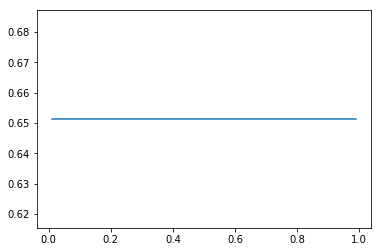

In [25]:
##get highest MCC value
thresholds = np.linspace(0.01, 0.99, 50)
mcc = np.array([matthews_corrcoef(Y, X_preds>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
best_threshold = thresholds[mcc.argmax()]
print(mcc.max())
print(best_threshold)

In [35]:
preds1=preds1.astype(int)
sub = pd.DataFrame({'PERID': ts_PERID, 'Criminal': preds1})
sub=sub.reindex(columns=["PERID","Criminal"])
filename = 'submission.csv'
sub.to_csv(filename, index=False)

In [65]:
prediction_rfc=list(range(len(preds1)))
for i in range(len(preds1)):
    prediction_rfc[i]=1 if preds1[i]>best_threshold else 0

sub = pd.DataFrame({'PERID': ts_PERID, 'Criminal': prediction_rfc})
sub=sub.reindex(columns=["PERID","Criminal"])
filename = 'submission.csv'
sub.to_csv(filename, index=False)

In [67]:
prediction_rfc=list(range(len(preds1)))
for i in range(len(preds1)):
    prediction_rfc[i]=1 if preds1[i]>best_threshold else 0

sub = pd.DataFrame({'PERID': ts_PERID, 'Criminal': prediction_rfc})
sub=sub.reindex(columns=["PERID","Criminal"])
filename = 'submission_test_'+'lrstack1_'+str(mcc.max())+'.csv'
sub.to_csv(filename, index=False)


prediction_tr=list(range(len(X_preds)))
for i in range(len(X_preds)):
    prediction_tr[i]=1 if X_preds[i]>best_threshold else 0

sub = pd.DataFrame({'PERID': tr_PERID, 'Criminal': prediction_tr})
sub=sub.reindex(columns=["PERID","Criminal"])
filename = filename = 'submission_train_'+'lrstack1_'+str(mcc.max())+'.csv'
sub.to_csv(filename, index=False)

In [ ]:
prediction_rfc=(lgb_ts['Criminal']+xgb_ts['Criminal'])/2
# +lr_ts['Criminal']+rgf_ts['Criminal']

In [20]:
# preds1 = (rgf_ts['Criminal']+lr_ts1['Criminal']+xgb_ts['Criminal']+lgb_ts4['Criminal']+lgb_ts7['Criminal'])/5 #84340
# lgb_tr['Criminal'],lr_tr['Criminal'],lgb_tr1['Criminal'],rgf_tr['Criminal'],xgb_tr['Criminal']
# preds1 = (rgf_tsnew1['Criminal']+lr_ts1['Criminal']+xgb_ts['Criminal']+lgb_tsnew2['Criminal']+lgb_ts7['Criminal'])/5 #8421

preds1 = (rgf_ts['Criminal']+lr_ts1['Criminal']+xgb_ts['Criminal']+sub_nocat_nn['Criminal']+lgb_ts7['Criminal'])/5
# preds1 = (lgb_ts1['Criminal']+lgb_ts2['Criminal']+lgb_ts3['Criminal']+lgb_ts4['Criminal']+lgb_ts5['Criminal']+lgb_ts6['Criminal']+lgb_ts7['Criminal'])/7
# preds1=(lgb_ts['Criminal']+xgb_ts['Criminal'])/2
# preds1=(lgb_ts['Criminal']+lr_ts['Criminal']+xgb_ts['Criminal'])/3

prediction_rfc=list(range(len(preds1)))
for i in range(len(preds1)):
    prediction_rfc[i]=1 if preds1[i]>=0.80 else 0

sub = pd.DataFrame({'PERID': ts_PERID, 'Criminal': prediction_rfc})
sub=sub.reindex(columns=["PERID","Criminal"])
filename = 'submission.csv'
sub.to_csv(filename, index=False)

In [ ]:
# preds1 = (lgb_ts['Criminal']+lr_ts['Criminal']+rgf_ts['Criminal']+lgb_ts1['Criminal']+xgb_ts['Criminal'])/5
preds1 = (rgf_ts['Criminal']+rgf_ts1['Criminal']+lr_ts1['Criminal']+xgb_ts['Criminal']+lgb_ts4['Criminal']+lgb_ts7['Criminal'])/6
# preds1 = (lgb_ts1['Criminal']+lgb_ts2['Criminal']+lgb_ts3['Criminal']+lgb_ts4['Criminal']+lgb_ts5['Criminal']+lgb_ts6['Criminal']+lgb_ts7['Criminal'])/7
print(set(preds1))

In [ ]:

preds1 = (sub1['Criminal']+sub2['Criminal']+sub3['Criminal']+sub4['Criminal']+sub5['Criminal']+sub6['Criminal'])/6

prediction_rfc=list(range(len(preds1)))
for i in range(len(preds1)):
    prediction_rfc[i]=1 if preds1[i]>0.33 else 0

sub = pd.DataFrame({'PERID': ts_PERID, 'Criminal': prediction_rfc})
sub=sub.reindex(columns=["PERID","Criminal"])
filename = 'submission.csv'
sub.to_csv(filename, index=False)

In [ ]:
preds1 = (sub1['Criminal']+sub2['Criminal']+sub3['Criminal']+sub4['Criminal']+sub5['Criminal']+sub6['Criminal'])/6

In [ ]:
os.listdir()

In [ ]:
%%time
##submision files from the previous metrics
cat2d_ts = pd.read_csv('main_Catboost_count_2D.test.csv', header=None)
cat2d_tr = pd.read_csv('main_Catboost_count_2D.train.csv', header=None)
ext2d_ts = pd.read_csv('main_extratree_count_2D.test.csv', header=None)
ext2d_tr = pd.read_csv('main_extratree_count_2D.train.csv', header=None)
lgm2d_ts = pd.read_csv('main_lgmboost_count_2D.test.csv', header=None)
lgm2d_tr = pd.read_csv('main_lgmboost_count_2D.train.csv', header=None)
lgmtun2d_ts = pd.read_csv('main_lgmboost_count_2D_tuned.test.csv', header=None)
lgmtun2d_tr = pd.read_csv('main_lgmboost_count_2D_tuned.train.csv', header=None)
log1w_ts = pd.read_csv('main_logit_1way.test.csv', header=None)
log1w_tr = pd.read_csv('main_logit_1way.train.csv', header=None)
log2w_ts = pd.read_csv('main_logit_2way2.test.csv', header=None)
log2w_tr = pd.read_csv('main_logit_2way2.train.csv', header=None)
log4w_ts = pd.read_csv('main_logit_2way4.test.csv', header=None)
log4w_tr = pd.read_csv('main_logit_2way4.train.csv', header=None)
nn2d_ts = pd.read_csv('main_NN_2D.test.csv', header=None)
nn2d_tr = pd.read_csv('main_NN_2D.train.csv', header=None)
rfc2d_ts = pd.read_csv('main_randomforrest_count_1D.test.csv', header=None)
rfc2d_tr = pd.read_csv('main_randomforrest_count_1D.train.csv', header=None)
rgf2d_ts = pd.read_csv('main_rgf_2D.test.csv', header=None)
rgf2d_tr = pd.read_csv('main_rgf_2D.train.csv', header=None)
rgfcoun2d_ts = pd.read_csv('main_rgf_count_2D.test.csv', header=None)
rgfcoun2d_tr = pd.read_csv('main_rgf_count_2D.train.csv', header=None)
xgb1d_ts = pd.read_csv('main_xgboos_count_1D.test.csv', header=None)
xgb1d_tr = pd.read_csv('main_xgboos_count_1D.train.csv', header=None)
xgb2d_ts = pd.read_csv('main_xgboos_count_2D.test.csv', header=None)
xgb2d_tr = pd.read_csv('main_xgboos_count_2D.train.csv', header=None)

test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [ ]:
X_tr=np.column_stack((cat2d_tr[0],ext2d_tr[0],lgm2d_tr[0],lgmtun2d_tr[0],log1w_tr[0],log2w_tr[0],log4w_tr[0],nn2d_tr[0],rfc2d_tr[0],rgf2d_tr[0],rgfcoun2d_tr[0],xgb1d_tr[0],xgb2d_tr[0]))
X_ts=np.column_stack((cat2d_ts[0],ext2d_ts[0],lgm2d_ts[0],lgmtun2d_ts[0],log1w_ts[0],log2w_ts[0],log4w_ts[0],nn2d_ts[0],rfc2d_ts[0],rgf2d_ts[0],rgfcoun2d_ts[0],xgb1d_ts[0],xgb2d_ts[0]))
Y_tr=train['Criminal'].values

In [ ]:
weights = [1.0,1.0,1.0,1.0,1.0] # your weights for each model
rgf_ts['Criminal']+lr_ts['Criminal']+xgb_ts['Criminal']+lgb_ts4['Criminal']+lgb_ts7['Criminal']
files = ['submission_test__Rgf_0.6517340388845543.csv', 'submission_test__Lr_0.650642725010492.csv',
         'submission_test__Xgb_0.6476731391728516.csv','submission_test_lgb4_0.654614977600063.csv',
        'submission_test_lgb7_0.6483687842355492.csv'] # your prediction files 

finalRank = 0
for i in range(len(files)):
    temp_df = pd.read_csv(files[i])
    finalRank = finalRank + rankdata(temp_df.Criminal, method='ordinal') * weights[i]
finalRank = finalRank / (max(finalRank) + 1.0)

prediction_rfc=list(range(len(finalRank)))
for i in range(len(finalRank)):
    prediction_rfc[i]=1 if finalRank[i]>0.5 else 0

sub = pd.DataFrame({'PERID': ts_PERID, 'Criminal': prediction_rfc})
sub=sub.reindex(columns=["PERID","Criminal"])
filename = 'submission.csv'
sub.to_csv(filename, index=False)

In [270]:
##brute forcing by changing single single prediction between blend of blends and Neural network on boruta feature selection.
jk=[13204699,95457799,80497109,48947409,68294339,59884840,19700450,65868470,79327480,35735890,79560100,81698710,19614320,63852620]
jk1=[18381779,73135979,91094079,34102389,69211499,17013909,41211139,83934640,73988690,47677120]
su=sub_84340
for k,i in zip(lgb_ts['PERID'],su['Criminal']):
    if k in jk1:
        su.loc[su['PERID'] == k, 'Criminal'] = 0
    if k in jk:
        su.loc[su['PERID'] == k, 'Criminal'] = 1

In [ ]:
filename = 'subm.csv'
su.to_csv(filename, index=False)